In [1]:

import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import RobustScaler
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


In [2]:
score = pd.read_excel("C:/Users/admin/Pictures/Data.xlsx",sheet_name=0, index_col = "PLAYER")

In [3]:
score.head()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
PLAYER,,,,,,,,,,,,,
Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
AB de Villiers,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
Abhishek Sharma,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
Ajinkya Rahane,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


In [4]:
score.isnull().sum()

Mat          0
Inns         0
NO           0
2018_Runs    0
HS           0
Avg          0
BF           0
SR           0
100          0
50           0
4s           0
6s           0
2019_Runs    0
dtype: int64

<AxesSubplot:ylabel='PLAYER'>

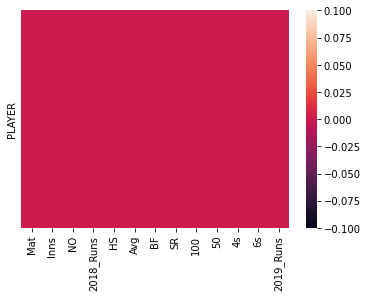

In [5]:
sns.heatmap(score.isnull(), yticklabels=False)

In [6]:
score.shape

(100, 13)

In [7]:
score.info

<bound method DataFrame.info of                    Mat  Inns  NO  2018_Runs   HS    Avg   BF      SR  100  50  \
PLAYER                                                                          
Aaron Finch         10     9   1        134   46  16.75  100  134.00    0   0   
AB de Villiers      12    11   2        480  90*  53.33  275  174.54    0   6   
Abhishek Sharma      3     3   2         63  46*     63   33  190.90    0   0   
Ajinkya Rahane      15    14   1        370  65*  28.46  313  118.21    0   1   
Alex Hales           6     6   0        148   45  24.66  118  125.42    0   0   
...                ...   ...  ..        ...  ...    ...  ...     ...  ...  ..   
Virat Kohli         14    14   3        530  92*  48.18  381  139.10    0   4   
Washington Sundar    7     6   3         65   35  21.66   38  171.05    0   0   
Wriddhiman Saha     11    10   2        122   35  15.25  102  119.60    0   0   
Yusuf Pathan        15    13   4        260  45*  28.88  200  130.00    0   0

In [8]:
score.dtypes

Mat            int64
Inns           int64
NO             int64
2018_Runs      int64
HS            object
Avg           object
BF             int64
SR           float64
100            int64
50             int64
4s             int64
6s             int64
2019_Runs      int64
dtype: object

In [9]:
score.head()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs
PLAYER,,,,,,,,,,,,,
Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160
AB de Villiers,12,11,2,480,90*,53.33,275,174.54,0,6,39,30,424
Abhishek Sharma,3,3,2,63,46*,63,33,190.90,0,0,3,5,63
Ajinkya Rahane,15,14,1,370,65*,28.46,313,118.21,0,1,39,5,396
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165


In [10]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('*', ''))
    return(x)

In [11]:
score['HS']  = score['HS'] .apply(clean_currency).astype('int')
score['HS_c'] = score['HS'].apply(lambda x: type(x).__name__)


In [12]:

score['HS']




PLAYER
Aaron Finch          46
AB de Villiers       90
Abhishek Sharma      46
Ajinkya Rahane       65
Alex Hales           45
                     ..
Virat Kohli          92
Washington Sundar    35
Wriddhiman Saha      35
Yusuf Pathan         45
Yuvraj Singh         20
Name: HS, Length: 100, dtype: int32

In [13]:
score.head()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs,HS_c
PLAYER,,,,,,,,,,,,,,
Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160,int
AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30,424,int
Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,0,3,5,63,int
Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5,396,int
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165,int


In [14]:
score.loc[score.Avg == '-', 'Avg'] = score['2018_Runs'].loc[score.Avg == '-'].copy()
score.Avg = score.Avg.astype('float64')

In [15]:
score.head()

,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s,2019_Runs,HS_c
PLAYER,,,,,,,,,,,,,,
Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8,160,int
AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30,424,int
Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,0,0,3,5,63,int
Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5,396,int
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6,165,int


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

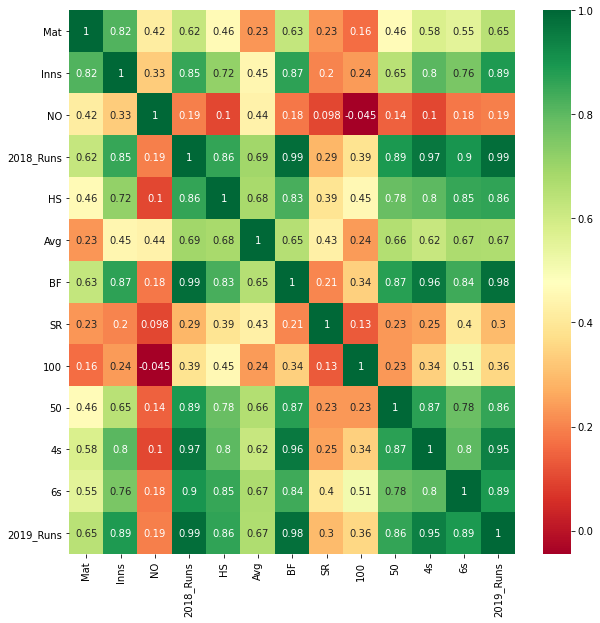

In [17]:
corrmat = score.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))

g = sns.heatmap(score[top_corr_features].corr(),annot=True, cmap="RdYlGn")

In [18]:
#independent and dependent features
X = score.iloc[:,:12]
y = score.iloc[:,12]


In [19]:
X.head()


,Mat,Inns,NO,2018_Runs,HS,Avg,BF,SR,100,50,4s,6s
PLAYER,,,,,,,,,,,,
Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,0,6,8
AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,6,39,30
Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,0,0,3,5
Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,1,39,5
Alex Hales,6,6,0,148,45,24.66,118,125.42,0,0,13,6


In [20]:
X['tot_runs'] = X['2018_Runs'].copy()
X = X.drop("2018_Runs", axis=1)
X.head()

,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s,tot_runs
PLAYER,,,,,,,,,,,,
Aaron Finch,10,9,1,46,16.75,100,134.00,0,0,6,8,134
AB de Villiers,12,11,2,90,53.33,275,174.54,0,6,39,30,480
Abhishek Sharma,3,3,2,46,63.00,33,190.90,0,0,3,5,63
Ajinkya Rahane,15,14,1,65,28.46,313,118.21,0,1,39,5,370
Alex Hales,6,6,0,45,24.66,118,125.42,0,0,13,6,148


In [21]:
X.reset_index(drop= True)

,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s,tot_runs
0,10,9,1,46,16.75,100,134.00,0,0,6,8,134
1,12,11,2,90,53.33,275,174.54,0,6,39,30,480
2,3,3,2,46,63.00,33,190.90,0,0,3,5,63
3,15,14,1,65,28.46,313,118.21,0,1,39,5,370
4,6,6,0,45,24.66,118,125.42,0,0,13,6,148
...,...,...,...,...,...,...,...,...,...,...,...,...
95,14,14,3,92,48.18,381,139.10,0,4,52,18,530
96,7,6,3,35,21.66,38,171.05,0,0,5,4,65
97,11,10,2,35,15.25,102,119.60,0,0,17,1,122
98,15,13,4,45,28.88,200,130.00,0,0,22,11,260


In [22]:
y.head()

PLAYER
Aaron Finch        160
AB de Villiers     424
Abhishek Sharma     63
Ajinkya Rahane     396
Alex Hales         165
Name: 2019_Runs, dtype: int64

In [23]:
test_score = pd.read_excel("C:/Users/admin/Pictures/Data.xlsx",sheet_name=1, index_col = "PLAYER")
test_score['HS']  = test_score['HS'] .apply(clean_currency).astype('int')
test_score['HS_c'] = test_score['HS'].apply(lambda x: type(x).__name__)
test_score.loc[test_score.Avg == '-', 'Avg'] = test_score['2019_Runs'].loc[test_score.Avg == '-'].copy()
test_score.Avg = test_score.Avg.astype('float64')
test_score.head()

,Mat,Inns,NO,2019_Runs,HS,Avg,BF,SR,100,50,4s,6s,HS_c
PLAYER,,,,,,,,,,,,,
David Warner,12,12,2,692,100,69.20,481,143.86,1,8,57,21,int
KL Rahul,14,14,3,593,100,53.90,438,135.38,1,6,49,25,int
Quinton de Kock,16,16,1,529,81,35.26,398,132.91,0,4,45,25,int
Shikhar Dhawan,16,16,1,521,97,34.73,384,135.67,0,5,64,11,int
Andre Russell,14,13,4,510,80,56.66,249,204.81,0,4,31,52,int


In [24]:
X_test = test_score.copy(True)
X_test['tot_runs'] = X_test['2019_Runs'].copy()
X_test = X_test.drop('2019_Runs', axis=1)
X_test.head()

,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s,HS_c,tot_runs
PLAYER,,,,,,,,,,,,,
David Warner,12,12,2,100,69.20,481,143.86,1,8,57,21,int,692
KL Rahul,14,14,3,100,53.90,438,135.38,1,6,49,25,int,593
Quinton de Kock,16,16,1,81,35.26,398,132.91,0,4,45,25,int,529
Shikhar Dhawan,16,16,1,97,34.73,384,135.67,0,5,64,11,int,521
Andre Russell,14,13,4,80,56.66,249,204.81,0,4,31,52,int,510


In [25]:
X_test = X_test.drop('HS_c', axis=1)
X_test.head()

,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s,tot_runs
PLAYER,,,,,,,,,,,,
David Warner,12,12,2,100,69.20,481,143.86,1,8,57,21,692
KL Rahul,14,14,3,100,53.90,438,135.38,1,6,49,25,593
Quinton de Kock,16,16,1,81,35.26,398,132.91,0,4,45,25,529
Shikhar Dhawan,16,16,1,97,34.73,384,135.67,0,5,64,11,521
Andre Russell,14,13,4,80,56.66,249,204.81,0,4,31,52,510


In [26]:
X_test.reset_index(drop= True)

,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s,tot_runs
0,12,12,2,100,69.20,481,143.86,1,8,57,21,692
1,14,14,3,100,53.90,438,135.38,1,6,49,25,593
2,16,16,1,81,35.26,398,132.91,0,4,45,25,529
3,16,16,1,97,34.73,384,135.67,0,5,64,11,521
4,14,13,4,80,56.66,249,204.81,0,4,31,52,510
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2,0,6,5.50,10,110.00,0,0,1,0,11
96,13,3,3,10,10.00,3,333.33,0,0,1,1,10
97,3,1,0,9,9.00,10,90.00,0,0,0,0,9
98,7,4,0,5,2.25,12,75.00,0,0,1,0,9


In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1,random_state=0)


In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.plotting.register_matplotlib_converters()

In [29]:
X_transformer = RobustScaler().fit(X_train)
X_transformer.transform(X_train)
X_train.head()

,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s,tot_runs
PLAYER,,,,,,,,,,,,
Manoj Tiwary,5,4,1,35,15.66,44,106.81,0,0,4,1,47
Tim Southee,8,4,2,36,26.00,46,113.04,0,0,5,1,52
Sarfaraz Khan,7,6,1,22,10.20,41,124.39,0,0,7,1,51
Carlos Brathwaite,4,4,1,43,25.00,48,156.25,0,0,1,8,75
Andrew Tye,14,8,2,14,5.33,38,84.21,0,0,2,1,32


In [30]:
my_model = XGBRegressor(n_estimators=500, learning_rate=0.09)
my_model.fit(X_train, y_train, 
             early_stopping_rounds= 50, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
print(mean_squared_error(y_train, my_model.predict(X_train)))
print(mean_absolute_error(y_train, my_model.predict(X_train)))
print(mean_squared_error(y_valid, my_model.predict(X_valid)))
print(mean_absolute_error(y_valid, my_model.predict(X_valid)))

[17:32:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.08389217062662688
0.19211214913262262
670.413401081428
13.532354164123536


In [31]:
cv_res = cross_validate(my_model, X, y)

[17:32:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
cv_res['test_score']

array([0.99439805, 0.99386121, 0.95088013, 0.94741221, 0.99630456])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 1000, init = 'he_uniform',activation='relu',input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 500, init = 'he_uniform',activation='relu'))
classifier.add(Dense(output_dim = 250, init = 'he_uniform',activation='relu'))
classifier.add(Dense(output_dim = 125, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))
classifier.add(Dense(output_dim = 5, init = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss='MSE', optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.1, batch_size = 5, nb_epoch = 2000)


Using TensorFlow backend.
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=12, units=1000, kernel_initializer="he_uniform")`
  if sys.path[0] == '':
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=500, kernel_initializer="he_uniform")`
  from ipykernel import kernelapp as app
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=250, kernel_initializer="he_uniform")`
  app.launch_new_instance()
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=125, kernel_initializer="he_uniform")`
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserW

Train on 81 samples, validate on 9 samples
Epoch 1/2000
81/81 [==============================] - 0s 5ms/step - loss: 18636.7698 - val_loss: 274.7231
Epoch 2/2000
81/81 [==============================] - 0s 3ms/step - loss: 3110.5650 - val_loss: 535.0338
Epoch 3/2000
81/81 [==============================] - 0s 3ms/step - loss: 1491.6101 - val_loss: 89.6740
Epoch 4/2000
81/81 [==============================] - 0s 3ms/step - loss: 481.0688 - val_loss: 245.0320
Epoch 5/2000
81/81 [==============================] - 0s 3ms/step - loss: 620.4018 - val_loss: 150.0235
Epoch 6/2000
81/81 [==============================] - 0s 3ms/step - loss: 538.6418 - val_loss: 320.0355
Epoch 7/2000
81/81 [==============================] - 0s 3ms/step - loss: 418.6021 - val_loss: 177.1429
Epoch 8/2000
81/81 [==============================] - 0s 3ms/step - loss: 1361.2519 - val_loss: 112.0692
Epoch 9/2000
81/81 [==============================] - 0s 3ms/step - loss: 1054.6382 - val_loss: 76.4599
Epoch 10/2000
81/

81/81 [==============================] - 0s 3ms/step - loss: 585.9102 - val_loss: 100.5493
Epoch 79/2000
81/81 [==============================] - 0s 3ms/step - loss: 213.2377 - val_loss: 49.9272
Epoch 80/2000
81/81 [==============================] - 0s 3ms/step - loss: 588.0946 - val_loss: 274.7551
Epoch 81/2000
81/81 [==============================] - 0s 3ms/step - loss: 405.8567 - val_loss: 64.9089
Epoch 82/2000
81/81 [==============================] - 0s 4ms/step - loss: 185.9821 - val_loss: 47.7817
Epoch 83/2000
81/81 [==============================] - 0s 3ms/step - loss: 299.2484 - val_loss: 65.9070
Epoch 84/2000
81/81 [==============================] - 0s 3ms/step - loss: 232.6071 - val_loss: 54.8264
Epoch 85/2000
81/81 [==============================] - 0s 3ms/step - loss: 186.2187 - val_loss: 64.8875
Epoch 86/2000
81/81 [==============================] - 0s 3ms/step - loss: 242.5183 - val_loss: 22.6963
Epoch 87/2000
81/81 [==============================] - 0s 3ms/step - loss: 3

81/81 [==============================] - 0s 4ms/step - loss: 952.6236 - val_loss: 51.4365
Epoch 157/2000
81/81 [==============================] - 0s 3ms/step - loss: 410.0768 - val_loss: 64.8755
Epoch 158/2000
81/81 [==============================] - 0s 3ms/step - loss: 162.1235 - val_loss: 36.2775
Epoch 159/2000
81/81 [==============================] - 0s 4ms/step - loss: 144.5180 - val_loss: 31.5351
Epoch 160/2000
81/81 [==============================] - 0s 3ms/step - loss: 187.1781 - val_loss: 39.2463
Epoch 161/2000
81/81 [==============================] - 0s 3ms/step - loss: 311.7314 - val_loss: 62.8176
Epoch 162/2000
81/81 [==============================] - 0s 4ms/step - loss: 290.4018 - val_loss: 99.7751
Epoch 163/2000
81/81 [==============================] - 0s 3ms/step - loss: 173.5868 - val_loss: 20.7107
Epoch 164/2000
81/81 [==============================] - 0s 3ms/step - loss: 124.7715 - val_loss: 64.7307
Epoch 165/2000
81/81 [==============================] - 0s 3ms/step - 

Epoch 234/2000
81/81 [==============================] - 0s 3ms/step - loss: 91.0864 - val_loss: 8.0128
Epoch 235/2000
81/81 [==============================] - 0s 3ms/step - loss: 340.0944 - val_loss: 42.4914
Epoch 236/2000
81/81 [==============================] - 0s 3ms/step - loss: 165.4239 - val_loss: 75.5367
Epoch 237/2000
81/81 [==============================] - 0s 3ms/step - loss: 280.4289 - val_loss: 109.8513
Epoch 238/2000
81/81 [==============================] - 0s 3ms/step - loss: 514.4100 - val_loss: 374.9564
Epoch 239/2000
81/81 [==============================] - 0s 3ms/step - loss: 637.3548 - val_loss: 43.5011
Epoch 240/2000
81/81 [==============================] - 0s 3ms/step - loss: 508.0916 - val_loss: 25.6311
Epoch 241/2000
81/81 [==============================] - 0s 3ms/step - loss: 112.5040 - val_loss: 17.6523
Epoch 242/2000
81/81 [==============================] - 0s 3ms/step - loss: 97.9513 - val_loss: 8.7630
Epoch 243/2000
81/81 [==============================] - 0

81/81 [==============================] - 0s 3ms/step - loss: 57.8451 - val_loss: 9.4558
Epoch 313/2000
81/81 [==============================] - 0s 3ms/step - loss: 80.8590 - val_loss: 50.7564
Epoch 314/2000
81/81 [==============================] - 0s 3ms/step - loss: 63.8477 - val_loss: 26.9730
Epoch 315/2000
81/81 [==============================] - 0s 3ms/step - loss: 42.5081 - val_loss: 4.8269
Epoch 316/2000
81/81 [==============================] - 0s 3ms/step - loss: 68.9224 - val_loss: 64.1444
Epoch 317/2000
81/81 [==============================] - 0s 3ms/step - loss: 144.3759 - val_loss: 32.3034
Epoch 318/2000
81/81 [==============================] - 0s 3ms/step - loss: 76.4129 - val_loss: 11.3642
Epoch 319/2000
81/81 [==============================] - 0s 3ms/step - loss: 74.7161 - val_loss: 12.8008
Epoch 320/2000
81/81 [==============================] - 0s 3ms/step - loss: 100.0467 - val_loss: 18.6643
Epoch 321/2000
81/81 [==============================] - 0s 3ms/step - loss: 112

Epoch 391/2000
81/81 [==============================] - 0s 3ms/step - loss: 66.9833 - val_loss: 10.8540
Epoch 392/2000
81/81 [==============================] - 0s 3ms/step - loss: 43.4618 - val_loss: 13.0266
Epoch 393/2000
81/81 [==============================] - 0s 3ms/step - loss: 39.7533 - val_loss: 12.6306
Epoch 394/2000
81/81 [==============================] - 0s 3ms/step - loss: 94.2018 - val_loss: 23.7001
Epoch 395/2000
81/81 [==============================] - 0s 3ms/step - loss: 199.5504 - val_loss: 4.9691
Epoch 396/2000
81/81 [==============================] - 0s 3ms/step - loss: 42.6441 - val_loss: 3.6788
Epoch 397/2000
81/81 [==============================] - 0s 4ms/step - loss: 37.1023 - val_loss: 5.7649
Epoch 398/2000
81/81 [==============================] - 0s 4ms/step - loss: 41.8421 - val_loss: 1.1299
Epoch 399/2000
81/81 [==============================] - 0s 4ms/step - loss: 82.3323 - val_loss: 4.2848
Epoch 400/2000
81/81 [==============================] - 0s 3ms/step 

Epoch 470/2000
81/81 [==============================] - 0s 3ms/step - loss: 84.0764 - val_loss: 6.0499
Epoch 471/2000
81/81 [==============================] - 0s 3ms/step - loss: 50.6492 - val_loss: 19.0566
Epoch 472/2000
81/81 [==============================] - 0s 3ms/step - loss: 63.9817 - val_loss: 19.4594
Epoch 473/2000
81/81 [==============================] - 0s 3ms/step - loss: 64.6547 - val_loss: 19.1646
Epoch 474/2000
81/81 [==============================] - 0s 3ms/step - loss: 41.8492 - val_loss: 9.1506
Epoch 475/2000
81/81 [==============================] - 0s 3ms/step - loss: 50.3616 - val_loss: 12.8106
Epoch 476/2000
81/81 [==============================] - 0s 3ms/step - loss: 58.9446 - val_loss: 15.4516
Epoch 477/2000
81/81 [==============================] - 0s 3ms/step - loss: 72.0815 - val_loss: 11.1733
Epoch 478/2000
81/81 [==============================] - 0s 3ms/step - loss: 138.5434 - val_loss: 7.6777
Epoch 479/2000
81/81 [==============================] - 0s 3ms/ste

81/81 [==============================] - 0s 3ms/step - loss: 306.1380 - val_loss: 134.6949
Epoch 549/2000
81/81 [==============================] - 0s 3ms/step - loss: 373.8076 - val_loss: 31.1665
Epoch 550/2000
81/81 [==============================] - 0s 3ms/step - loss: 475.5679 - val_loss: 84.0149
Epoch 551/2000
81/81 [==============================] - 0s 3ms/step - loss: 145.7010 - val_loss: 45.3033
Epoch 552/2000
81/81 [==============================] - 0s 3ms/step - loss: 92.7310 - val_loss: 14.9091
Epoch 553/2000
81/81 [==============================] - 0s 3ms/step - loss: 38.6086 - val_loss: 17.0028
Epoch 554/2000
81/81 [==============================] - 0s 3ms/step - loss: 35.9885 - val_loss: 14.0318
Epoch 555/2000
81/81 [==============================] - 0s 3ms/step - loss: 21.7046 - val_loss: 15.9894
Epoch 556/2000
81/81 [==============================] - 0s 3ms/step - loss: 20.4584 - val_loss: 16.2904
Epoch 557/2000
81/81 [==============================] - 0s 3ms/step - loss

Epoch 627/2000
81/81 [==============================] - 0s 3ms/step - loss: 84.7561 - val_loss: 31.3305
Epoch 628/2000
81/81 [==============================] - 0s 3ms/step - loss: 32.6128 - val_loss: 9.4873
Epoch 629/2000
81/81 [==============================] - 0s 4ms/step - loss: 28.4002 - val_loss: 13.7418
Epoch 630/2000
81/81 [==============================] - 0s 4ms/step - loss: 62.7344 - val_loss: 26.3828
Epoch 631/2000
81/81 [==============================] - 0s 4ms/step - loss: 56.4225 - val_loss: 13.4265
Epoch 632/2000
81/81 [==============================] - 0s 4ms/step - loss: 80.0971 - val_loss: 25.5531
Epoch 633/2000
81/81 [==============================] - 0s 3ms/step - loss: 45.1353 - val_loss: 16.5342
Epoch 634/2000
81/81 [==============================] - 0s 4ms/step - loss: 24.1972 - val_loss: 28.8109
Epoch 635/2000
81/81 [==============================] - 0s 4ms/step - loss: 45.5771 - val_loss: 7.8936
Epoch 636/2000
81/81 [==============================] - 0s 4ms/ste

Epoch 706/2000
81/81 [==============================] - 0s 4ms/step - loss: 174.4120 - val_loss: 51.0441
Epoch 707/2000
81/81 [==============================] - 0s 5ms/step - loss: 124.8855 - val_loss: 14.7396
Epoch 708/2000
81/81 [==============================] - 0s 4ms/step - loss: 31.6879 - val_loss: 12.7530
Epoch 709/2000
81/81 [==============================] - 0s 3ms/step - loss: 52.6182 - val_loss: 17.7851
Epoch 710/2000
81/81 [==============================] - 0s 3ms/step - loss: 31.2433 - val_loss: 12.6593
Epoch 711/2000
81/81 [==============================] - 0s 4ms/step - loss: 14.4484 - val_loss: 11.7063
Epoch 712/2000
81/81 [==============================] - 0s 4ms/step - loss: 20.2385 - val_loss: 5.8657
Epoch 713/2000
81/81 [==============================] - 0s 5ms/step - loss: 12.9554 - val_loss: 7.5680
Epoch 714/2000
81/81 [==============================] - 0s 5ms/step - loss: 41.6523 - val_loss: 14.1491
Epoch 715/2000
81/81 [==============================] - 0s 5ms/s

Epoch 785/2000
81/81 [==============================] - 0s 6ms/step - loss: 15.3316 - val_loss: 8.3341
Epoch 786/2000
81/81 [==============================] - 0s 5ms/step - loss: 10.7751 - val_loss: 10.1911
Epoch 787/2000
81/81 [==============================] - 0s 6ms/step - loss: 28.2577 - val_loss: 18.2519
Epoch 788/2000
81/81 [==============================] - 0s 5ms/step - loss: 15.1699 - val_loss: 12.4226
Epoch 789/2000
81/81 [==============================] - 0s 6ms/step - loss: 25.7529 - val_loss: 25.1555
Epoch 790/2000
81/81 [==============================] - 1s 7ms/step - loss: 16.9909 - val_loss: 4.0243
Epoch 791/2000
81/81 [==============================] - 1s 10ms/step - loss: 17.3832 - val_loss: 6.4264
Epoch 792/2000
81/81 [==============================] - 1s 6ms/step - loss: 27.3901 - val_loss: 17.3817
Epoch 793/2000
81/81 [==============================] - 1s 6ms/step - loss: 21.4659 - val_loss: 3.7559
Epoch 794/2000
81/81 [==============================] - 0s 5ms/step

Epoch 864/2000
81/81 [==============================] - 0s 4ms/step - loss: 41.6185 - val_loss: 5.5178
Epoch 865/2000
81/81 [==============================] - 0s 4ms/step - loss: 33.2597 - val_loss: 22.1402
Epoch 866/2000
81/81 [==============================] - 0s 4ms/step - loss: 43.7440 - val_loss: 15.1748
Epoch 867/2000
81/81 [==============================] - 0s 5ms/step - loss: 64.4477 - val_loss: 33.7889
Epoch 868/2000
81/81 [==============================] - 0s 4ms/step - loss: 22.2555 - val_loss: 13.6926
Epoch 869/2000
81/81 [==============================] - 0s 4ms/step - loss: 21.6908 - val_loss: 27.3645
Epoch 870/2000
81/81 [==============================] - 0s 4ms/step - loss: 16.2272 - val_loss: 27.8146
Epoch 871/2000
81/81 [==============================] - 0s 4ms/step - loss: 35.6805 - val_loss: 38.4590
Epoch 872/2000
81/81 [==============================] - 0s 4ms/step - loss: 26.5859 - val_loss: 17.2689
Epoch 873/2000
81/81 [==============================] - 0s 4ms/st

Epoch 943/2000
81/81 [==============================] - 0s 3ms/step - loss: 16.3137 - val_loss: 16.4087
Epoch 944/2000
81/81 [==============================] - 0s 3ms/step - loss: 11.3929 - val_loss: 13.0528
Epoch 945/2000
81/81 [==============================] - 0s 4ms/step - loss: 9.4583 - val_loss: 20.2354
Epoch 946/2000
81/81 [==============================] - 0s 3ms/step - loss: 15.5870 - val_loss: 22.7496
Epoch 947/2000
81/81 [==============================] - 0s 4ms/step - loss: 33.4173 - val_loss: 33.3372
Epoch 948/2000
81/81 [==============================] - 0s 4ms/step - loss: 35.9611 - val_loss: 26.6236
Epoch 949/2000
81/81 [==============================] - 0s 4ms/step - loss: 35.3499 - val_loss: 10.6261
Epoch 950/2000
81/81 [==============================] - 0s 4ms/step - loss: 31.9509 - val_loss: 5.7356
Epoch 951/2000
81/81 [==============================] - 0s 4ms/step - loss: 23.2302 - val_loss: 14.8923
Epoch 952/2000
81/81 [==============================] - 0s 4ms/ste

Epoch 1022/2000
81/81 [==============================] - 0s 4ms/step - loss: 18.2037 - val_loss: 6.8185
Epoch 1023/2000
81/81 [==============================] - 0s 3ms/step - loss: 37.5363 - val_loss: 27.7004
Epoch 1024/2000
81/81 [==============================] - 0s 3ms/step - loss: 22.9996 - val_loss: 3.4742
Epoch 1025/2000
81/81 [==============================] - 0s 4ms/step - loss: 29.0079 - val_loss: 21.8206
Epoch 1026/2000
81/81 [==============================] - 0s 3ms/step - loss: 32.2192 - val_loss: 4.1484
Epoch 1027/2000
81/81 [==============================] - 0s 3ms/step - loss: 66.3524 - val_loss: 67.9507
Epoch 1028/2000
81/81 [==============================] - 0s 4ms/step - loss: 54.4367 - val_loss: 9.2167
Epoch 1029/2000
81/81 [==============================] - 0s 3ms/step - loss: 20.9642 - val_loss: 27.7670
Epoch 1030/2000
81/81 [==============================] - 0s 3ms/step - loss: 12.0039 - val_loss: 10.5481
Epoch 1031/2000
81/81 [==============================] - 0s

Epoch 1100/2000
81/81 [==============================] - 0s 3ms/step - loss: 6.2910 - val_loss: 11.7157
Epoch 1101/2000
81/81 [==============================] - 0s 3ms/step - loss: 7.7014 - val_loss: 7.2985
Epoch 1102/2000
81/81 [==============================] - 0s 3ms/step - loss: 6.2713 - val_loss: 6.5898
Epoch 1103/2000
81/81 [==============================] - 0s 3ms/step - loss: 7.4819 - val_loss: 10.9825
Epoch 1104/2000
81/81 [==============================] - 0s 3ms/step - loss: 10.8521 - val_loss: 6.8991
Epoch 1105/2000
81/81 [==============================] - 0s 4ms/step - loss: 4.3458 - val_loss: 9.6936
Epoch 1106/2000
81/81 [==============================] - 0s 3ms/step - loss: 6.5320 - val_loss: 6.0887
Epoch 1107/2000
81/81 [==============================] - 0s 3ms/step - loss: 10.3681 - val_loss: 10.6543
Epoch 1108/2000
81/81 [==============================] - 0s 4ms/step - loss: 14.9572 - val_loss: 5.5827
Epoch 1109/2000
81/81 [==============================] - 0s 4ms/ste

81/81 [==============================] - 0s 3ms/step - loss: 5.5604 - val_loss: 4.2253
Epoch 1180/2000
81/81 [==============================] - 0s 3ms/step - loss: 5.4936 - val_loss: 9.2375
Epoch 1181/2000
81/81 [==============================] - 0s 3ms/step - loss: 3.8454 - val_loss: 8.8919
Epoch 1182/2000
81/81 [==============================] - 0s 3ms/step - loss: 5.1053 - val_loss: 5.5453
Epoch 1183/2000
81/81 [==============================] - 0s 3ms/step - loss: 10.8266 - val_loss: 11.5354
Epoch 1184/2000
81/81 [==============================] - 0s 3ms/step - loss: 6.8350 - val_loss: 4.1588
Epoch 1185/2000
81/81 [==============================] - 0s 3ms/step - loss: 4.7049 - val_loss: 6.1429
Epoch 1186/2000
81/81 [==============================] - 0s 3ms/step - loss: 8.4920 - val_loss: 5.8625
Epoch 1187/2000
81/81 [==============================] - 0s 3ms/step - loss: 4.0582 - val_loss: 4.0428
Epoch 1188/2000
81/81 [==============================] - 0s 3ms/step - loss: 4.7053 - v

81/81 [==============================] - 1s 8ms/step - loss: 11.5584 - val_loss: 11.6266
Epoch 1258/2000
81/81 [==============================] - 1s 8ms/step - loss: 13.3646 - val_loss: 2.6570
Epoch 1259/2000
81/81 [==============================] - 1s 17ms/step - loss: 9.3993 - val_loss: 2.6109
Epoch 1260/2000
81/81 [==============================] - 1s 13ms/step - loss: 3.8865 - val_loss: 2.4839
Epoch 1261/2000
81/81 [==============================] - 1s 12ms/step - loss: 3.8586 - val_loss: 3.1042
Epoch 1262/2000
81/81 [==============================] - ETA: 0s - loss: 3.333 - 1s 7ms/step - loss: 3.2946 - val_loss: 2.8312
Epoch 1263/2000
81/81 [==============================] - 0s 6ms/step - loss: 3.6586 - val_loss: 9.6141
Epoch 1264/2000
81/81 [==============================] - 0s 6ms/step - loss: 16.8623 - val_loss: 3.0393
Epoch 1265/2000
81/81 [==============================] - 1s 7ms/step - loss: 8.7357 - val_loss: 3.9583
Epoch 1266/2000
81/81 [==============================] - 0

Epoch 1336/2000
81/81 [==============================] - 0s 3ms/step - loss: 13.0468 - val_loss: 10.8057
Epoch 1337/2000
81/81 [==============================] - 0s 3ms/step - loss: 66.4534 - val_loss: 25.1198
Epoch 1338/2000
81/81 [==============================] - 0s 3ms/step - loss: 75.0654 - val_loss: 5.5918
Epoch 1339/2000
81/81 [==============================] - 0s 3ms/step - loss: 48.3829 - val_loss: 8.5768
Epoch 1340/2000
81/81 [==============================] - 0s 3ms/step - loss: 24.6352 - val_loss: 11.9966
Epoch 1341/2000
81/81 [==============================] - 0s 3ms/step - loss: 107.3943 - val_loss: 6.5429
Epoch 1342/2000
81/81 [==============================] - 0s 3ms/step - loss: 159.1382 - val_loss: 22.5100
Epoch 1343/2000
81/81 [==============================] - 0s 3ms/step - loss: 84.6481 - val_loss: 164.0016
Epoch 1344/2000
81/81 [==============================] - 0s 3ms/step - loss: 84.9496 - val_loss: 11.9604
Epoch 1345/2000
81/81 [==============================] 

81/81 [==============================] - 1s 14ms/step - loss: 10.4896 - val_loss: 12.7362
Epoch 1415/2000
81/81 [==============================] - 1s 17ms/step - loss: 46.6272 - val_loss: 89.6236
Epoch 1416/2000
81/81 [==============================] - 2s 21ms/step - loss: 76.3480 - val_loss: 21.6931
Epoch 1417/2000
81/81 [==============================] - 1s 17ms/step - loss: 16.1369 - val_loss: 8.2083
Epoch 1418/2000
81/81 [==============================] - 1s 15ms/step - loss: 10.4723 - val_loss: 3.6267
Epoch 1419/2000
81/81 [==============================] - 1s 15ms/step - loss: 16.7676 - val_loss: 6.8191
Epoch 1420/2000
81/81 [==============================] - 1s 15ms/step - loss: 7.1283 - val_loss: 4.1111
Epoch 1421/2000
81/81 [==============================] - 1s 14ms/step - loss: 7.2046 - val_loss: 4.2552
Epoch 1422/2000
81/81 [==============================] - 1s 18ms/step - loss: 9.8072 - val_loss: 7.2613
Epoch 1423/2000
50/81 [=================>............] - ETA: 0s - loss

In [85]:

# MSE and MAE of NN model
print("Relu model ")
print("Training MSE:",mean_squared_error(y_train, classifier.predict(X_train)))
print("Training MAE:",mean_absolute_error(y_train, classifier.predict(X_train)))
print("Validation MSE:",mean_squared_error(y_valid, classifier.predict(X_valid)))
print("Validation MAE:",mean_absolute_error(y_valid, classifier.predict(X_valid)))

Relu model 
Training MSE: 2.6336474658727638
Training MAE: 0.9703147994147406
Validation MSE: 358.1646878231827
Validation MAE: 14.951343441009522


In [86]:
final_model = classifier

In [87]:
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [88]:
predictions = pd.Series(final_model.predict(X_test), index= test_data.index)

ValueError: Error when checking input: expected dense_117_input to have shape (12,) but got array with shape (13,)